Plan:

1. Mechanical issue: **still there**
2. Classification of 2 soft and 2 stiff objects: **I think we can up to some degree**
3. Transducer cover: **probably will be there**

### 1. Mechanical issue

In [1]:
from utils.helper import  *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
f_dir = 'diagnostic_data/class_test/'
# read all trials
n_trials = 2
n_iter = 20
objs=['stiff_block', 'carton_box', 'soft_block', 'sponge']
all_trials = list()
all_trials_rbtq = list()

for i in range(1,n_trials+1):
    for j in range(1,n_iter+1):
        obj = 'stiff_block'
        if (i == 1) & (j == 20):
            continue

        fname = f_dir + f"{obj}_trial{i}_{j}"
        temp_df_rbtq, start_time = read_robotiq(fname+'.rbtq')

        temp_df_rbtq = temp_df_rbtq.assign(iteration = j)
        temp_df_rbtq = temp_df_rbtq.assign(obj = obj)
        all_trials_rbtq.append(temp_df_rbtq)

        temp_df = read_tac_file2(fname+'.tact', start_time)
        #print(temp_df_rbtq.time[0], temp_df.time[0])
        temp_df = temp_df[temp_df.taxel != 0]
        temp_df = temp_df.assign(iteration = j)
        temp_df = temp_df.assign(obj = obj)
        temp_df = temp_df.assign(trials=i)
        all_trials.append(temp_df)

In [13]:
df_rbtq = pd.concat(all_trials_rbtq)
df = pd.concat(all_trials)
def map_to_finger(taxel_id):
    if (taxel_id <= 39) & (taxel_id >=1):
        return 'left_finger'
    else :
        return 'right_finger'

df = df.assign(finger_type = df.taxel.apply(map_to_finger))

In [22]:
count_df = df.groupby(['obj', 'iteration', 'trials', 'finger_type']).count().reset_index()

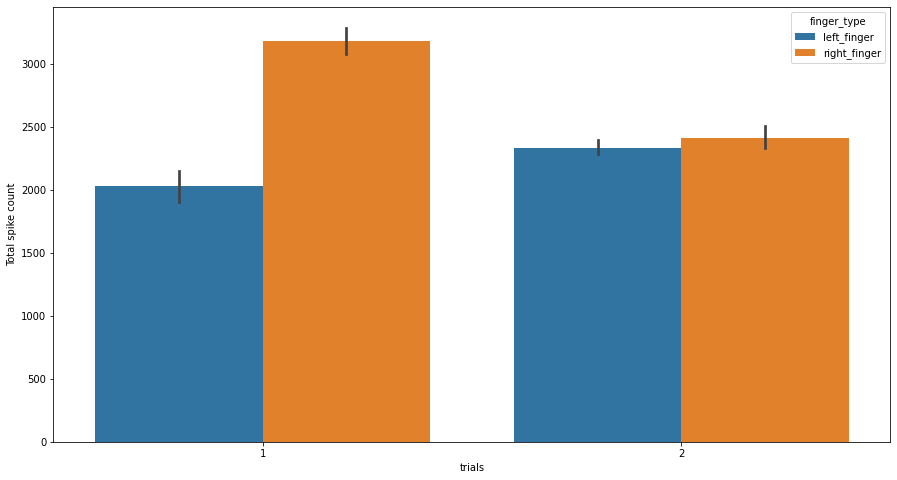

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(ax=ax, x = 'trials', y='time', hue='finger_type', data=count_df)
ax.set_ylabel('Total spike count')
plt.show()

one of the iteration of trial
##### Stiff block left
![log](diagnostic_data/class_test_imgs/stiff_block_left_finger_small_1.png)
##### Stiff block right
![log](diagnostic_data/class_test_imgs/stiff_block_right_finger_small_1.png)

another of the iteration of trial
##### Stiff block left
![log](diagnostic_data/class_test_imgs/stiff_block_left_finger_small_3_trial2.png)
##### Stiff block right
![log](diagnostic_data/class_test_imgs/stiff_block_right_finger_small_1_trial2.png)

#### 2. Classification of 2 soft and 2 stiff objs 

In [41]:
f_dir = 'diagnostic_data/class_test/'
# read all trials
n_trials = 2
n_iter = 20
objs=['stiff_block', 'carton_box', 'soft_block', 'sponge']
all_trials = list()
all_trials_rbtq = list()

for i in range(1,n_trials+1):
    for j in range(1,n_iter+1):
        for obj in objs:                
            fname = f_dir + f"{obj}_trial{i}_{j}"
            temp_df_rbtq, start_time = read_robotiq(fname+'.rbtq')
            
            temp_df_rbtq = temp_df_rbtq.assign(iteration = j)
            temp_df_rbtq = temp_df_rbtq.assign(obj = obj)
            temp_df_rbtq = temp_df_rbtq.assign(trials = i)
            all_trials_rbtq.append(temp_df_rbtq)
            
            temp_df = read_tac_file2(fname+'.tact', start_time)
            #print(temp_df_rbtq.time[0], temp_df.time[0])
            temp_df = temp_df[temp_df.taxel != 0]
            temp_df = temp_df.assign(iteration = j)
            temp_df = temp_df.assign(obj = obj)
            temp_df = temp_df.assign(trials = i)
            all_trials.append(temp_df)

In [42]:
df_rbtq = pd.concat(all_trials_rbtq)
df = pd.concat(all_trials)
def map_to_finger(taxel_id):
    if (taxel_id <= 39) & (taxel_id >=1):
        return 'left_finger'
    else :
        return 'right_finger'

df = df.assign(finger_type = df.taxel.apply(map_to_finger))

In [43]:
count_df = df.groupby(['obj', 'isNeg', 'iteration', 'trials']).count().reset_index()

In [46]:
trial1_mask = count_df.trials==1
trial2_mask = count_df.trials==2

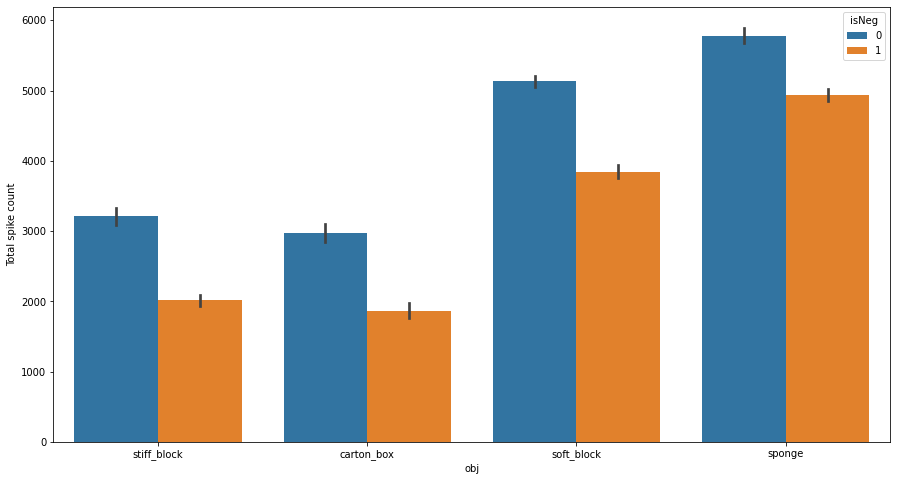

In [48]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(ax=ax, x = 'obj', y='time', hue='isNeg', order=objs, data=count_df[trial1_mask])
#ax.set_ylim([3500,6500])
ax.set_ylabel('Total spike count')
plt.show()

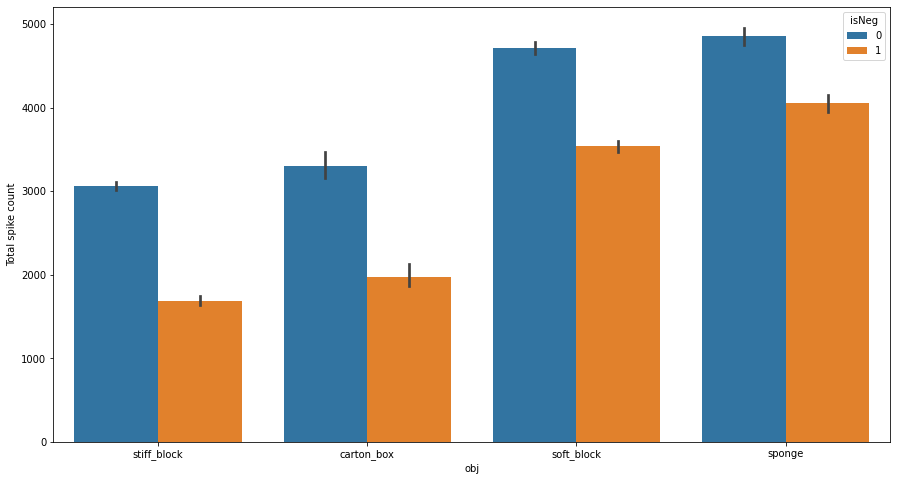

In [49]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(ax=ax, x = 'obj', y='time', hue='isNeg', order=objs, data=count_df[trial2_mask])
#ax.set_ylim([3500,6500])
ax.set_ylabel('Total spike count')
plt.show()

Finger wise

In [50]:
count_df = df.groupby(['obj', 'finger_type', 'iteration', 'trials']).count().reset_index()

In [51]:
trial1_mask = count_df.trials==1
trial2_mask = count_df.trials==2

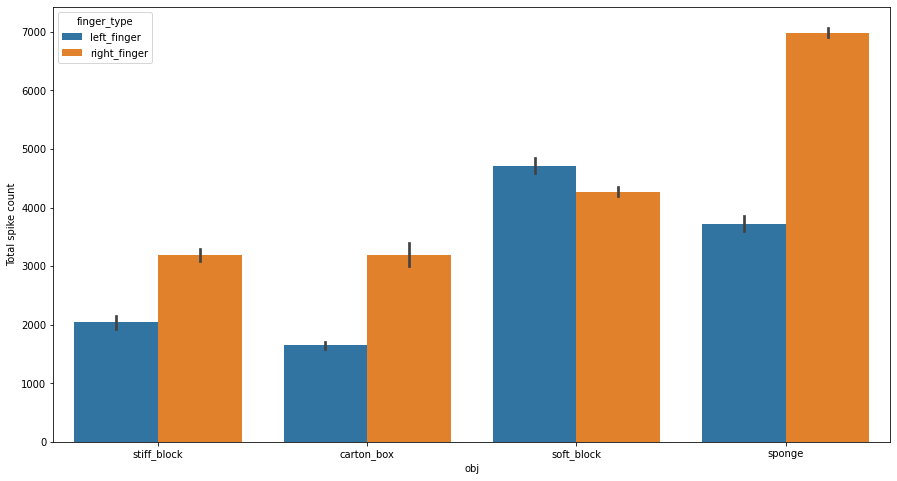

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(ax=ax, x = 'obj', y='time', hue='finger_type', order=objs, data=count_df[trial1_mask])
#ax.set_ylim([3500,6500])
ax.set_ylabel('Total spike count')
plt.show()

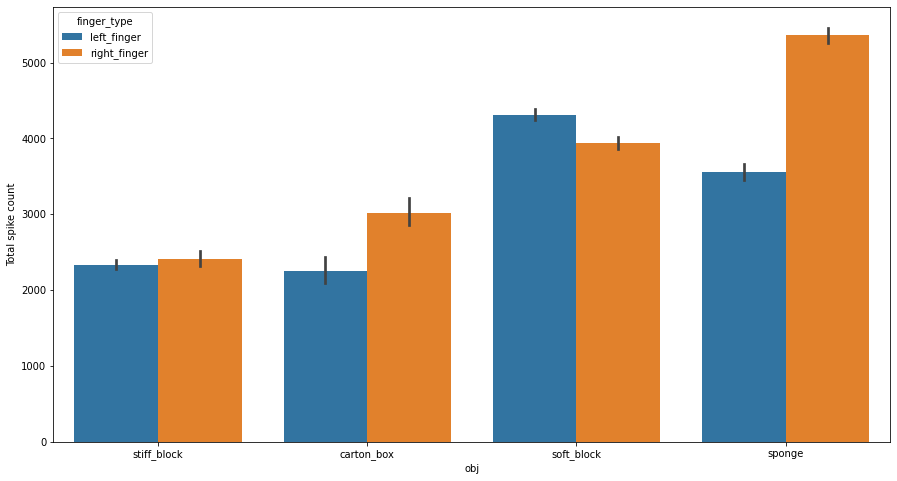

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(ax=ax, x = 'obj', y='time', hue='finger_type', order=objs, data=count_df[trial2_mask])
#ax.set_ylim([3500,6500])
ax.set_ylabel('Total spike count')
plt.show()

Temporal distribution

In [54]:
### See spikes over time
t_range = np.linspace(0, 4.4, 220)
df_bin_range = pd.cut(df.time, t_range)
groups = df.groupby(['iteration', 'finger_type','obj', 'trials', df_bin_range]).count()
count_df = groups.add_suffix('_count').reset_index()
def map_to_cat(x):
    return np.float(x.right)
count_df = count_df.assign(time_int = count_df.time.apply(map_to_cat).astype(np.float))

In [55]:
count_df.taxel_count = count_df.taxel_count.fillna(0)

In [ ]:
trial1_mask = count_df.trials==1
trial2_mask = count_df.trials==2

##### Trial 1
![log](4_objs_trial1.png)
##### Trial 2
![log](4_objs_trial2.png)

#### 3. Tranducer cover

<p float="left">
  <img src="finger_left.png" width="100" />
  <img src="finger_right.png" width="100" /> 
</p>


![alt-text-1](finger_left.png "title-1") ![alt-text-2](finger_right.png "title-2")

<img src="finger_left.png" width="50"/> <img src="finger_right.png" width="50"/> 